## **2024년 발매 곡, Top 50 히트곡, 그리고 최근 25년 빌보드 역주행 곡들을 분석**



---

1. **데이터 수집 및 정제**  
   - **Kaggle**에서 **Billboard Hot 100** 데이터를 가져와 정리  
   - **Spotify API**를 활용해 각 곡의 특성(feature)을 추출  
   - **2024년 발매된 곡** (1,000곡): 수집 했던 데이터를 통해 분석  
   - **최근 Top 50 곡**: 수집 했던 데이터를 통해 분석  
   - **빌보드 역주행 곡**: 빌보드 차트에서 역주행한 곡들을 선별하여 분석  

2. **분석 대상**  
   - 2024년 발매된 곡 (1,000곡)  
   - 최근 Top 50 곡  
   - 빌보드 역주행 곡  

3. **분석 및 시각화**  
   - 주요 특성 비교 (danceability, energy, speechiness 등)  
   - 그룹별 평균값을 레이더 차트로 시각화

### **Hot100 Data**

- **Date**: 차트 순위가 기록된 날짜, 즉 해당 순위가 기록된 기준 날짜
- **Song**: 빌보드 차트에 올라온 곡의 제목
- **Artist**: 해당 곡을 부른 아티스트 또는 그룹
- **Rank**: 해당 주차에서 곡의 순위
- **Last Week**: 이전 주차에서의 순위
- **Peak Position**: 해당 곡이 차트에서 도달한 최고 순위
- **Weeks in Charts**: 해당 곡이 빌보드 차트에 머문 주수
- **Image URL**: 곡의 앨범 커버 이미지 URL

In [ ]:
import pandas as pd


# 데이터 로드
hot100_df = pd.read_csv('hot100.csv')
hot100_df.head()


,Date,Song,Artist,Rank,Last Week,Peak Position,Weeks in Charts,Image URL
0,1958-08-06,Poor Little Fool,Ricky Nelson,1,1,1,2,#
1,1958-08-06,Nel Blu Dipinto Di Blu (Volare),Domenico Modugno,2,54,2,2,https://charts-static.billboard.com/img/1958/0...
2,1958-08-06,Patricia,Perez Prado And His Orchestra,3,2,2,2,#
3,1958-08-06,Splish Splash,Bobby Darin,4,3,3,2,https://charts-static.billboard.com/img/1958/0...
4,1958-08-06,When,Kalin Twins,5,5,5,2,#


#### **Peak Position**, **Weeks in Charts**, **Image URL** 컬럼은 불필요하기 때문에 제거합니다.

In [ ]:
# 제거할 컬럼 목록
cols_to_drop = ['Peak Position', 'Weeks in Charts', 'Image URL']

# 지정한 컬럼 제거
hot100_df = hot100_df.drop(columns=cols_to_drop)

# 제거 후 컬럼 이름 출력
hot100_df.head()


,Date,Song,Artist,Rank,Last Week
0,1958-08-06,Poor Little Fool,Ricky Nelson,1,1
1,1958-08-06,Nel Blu Dipinto Di Blu (Volare),Domenico Modugno,2,54
2,1958-08-06,Patricia,Perez Prado And His Orchestra,3,2
3,1958-08-06,Splish Splash,Bobby Darin,4,3
4,1958-08-06,When,Kalin Twins,5,5


역주행 곡을 골라내기 위해 **'Last Week'**와 **'Rank'** 컬럼을 숫자로 변환 후,    
####  **'Last Week'**와 **'Rank'**의 차이가 30 이상인 행들만 필터링하여 역주행한 곡들을 추출했습니다.

In [ ]:
# 'Last Week'와 'Rank' 컬럼을 숫자로 변환 (필요한 경우)
hot100_df['Last Week'] = pd.to_numeric(hot100_df['Last Week'], errors='coerce')
hot100_df['Rank'] = pd.to_numeric(hot100_df['Rank'], errors='coerce')

# 'Date' 컬럼을 날짜 형식으로 변환
hot100_df['Date'] = pd.to_datetime(hot100_df['Date'], errors='coerce')


# 'Last Week' - 'Rank' 값이 30 이상인 행들만 필터링
filtered_df = hot100_df[hot100_df['Last Week'] - hot100_df['Rank'] >= 30]

# 결과 확인
print(filtered_df.shape)
filtered_df.head()


(2223, 5)


,Date,Song,Artist,Rank,Last Week
1,1958-08-06,Nel Blu Dipinto Di Blu (Volare),Domenico Modugno,2,54
25,1958-08-06,Are You Really Mine,Jimmie Rodgers,26,93
33,1958-08-06,Bird Dog,The Everly Brothers,34,92
34,1958-08-06,Stupid Cupid,Connie Francis,35,72
36,1958-08-06,Volare (Nel Blu Dipinto Di Blu),Dean Martin,37,68


#### **역주행 곡들의 증가 추이**

<ipython-input-8-ed86176bb05f>:33: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


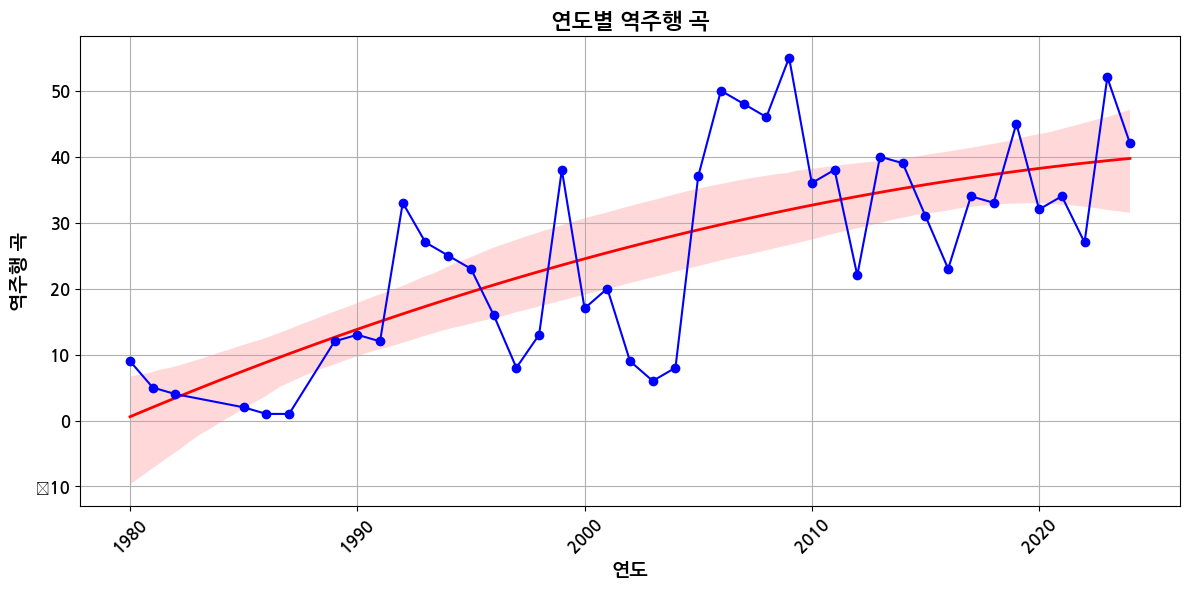

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1980년 이후의 데이터만 필터링
reversal_count_by_year = filtered_df.groupby(filtered_df['Date'].dt.year).size()
reversal_count_by_year = reversal_count_by_year[reversal_count_by_year.index >= 1980]

# 시계열 그래프 그리기 (연도별)
plt.figure(figsize=(12, 6))
sns.regplot(x=reversal_count_by_year.index, y=reversal_count_by_year.values,
            scatter=False, order=2, color='b', line_kws={"color": "red", "lw": 2})  # 추세선 추가
plt.plot(reversal_count_by_year.index, reversal_count_by_year.values, marker='o', linestyle='-', color='b')

# 그래프 제목과 레이블 설정
plt.title('연도별 역주행 곡', fontsize=16, fontweight='bold')
plt.xlabel('연도', fontsize=14, fontweight='bold')
plt.ylabel('역주행 곡', fontsize=14, fontweight='bold')

# x축 눈금 설정
plt.xticks(rotation=45, fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

# 격자 추가
plt.grid(True)
plt.tight_layout()

# 그래프 표시
plt.show()



#### 시계열 그래프와 추세선을 통해 역주행 곡들의 증가 추이를 확인할 수 있습니다. 40년간 **역주행 곡 수가 증가**하는 경향을 보이고 있습니다.




최근 음악의 특성과 과거 음악의 차이를 고려하여, 2000년 이후의 곡들만 필터링하여 분석했습니다.

In [ ]:
filtered_df = filtered_df[filtered_df['Date'].dt.year >= 2000]

### **빌보드 역주행 곡들의 특성을 Spotify API를 통해 가져오는 작업을 진행합니다.**

Spotify의 음악 특성을 받아오기 위해서는 먼저 트랙 ID를 받아와야 합니다.

In [ ]:
CLIENT_ID = ''
CLIENT_SECRET = ''
REDIRECT_URI = ''

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# 인증 객체 생성
client_credentials_manager = SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)


Spotify의 song ID를 가져오는 함수 정의


In [ ]:
def get_spotify_id(track_name, artist_name):
    query = f"track:{track_name} artist:{artist_name}"
    results = sp.search(q=query, type='track', limit=1)

    if results['tracks']['items']:
        track = results['tracks']['items'][0]
        return track['id']  # Spotify Track ID 반환
    else:
        return None  # 곡을 찾을 수 없으면 None 반환

# filtered_df에서 각 곡의 Spotify ID를 가져오기
filtered_df['Spotify_ID'] = filtered_df.apply(
    lambda row: get_spotify_id(row['Song'], row['Artist']), axis=1
)

# 결과 출력
print(filtered_df[['Song', 'Artist', 'Spotify_ID']].head())



                                       Song                     Artist  \
215893                       Auld Lang Syne                    Kenny G   
216111  Show Me The Meaning Of Being Lonely            Backstreet Boys   
216141                          Back At One                 Mark Wills   
216143                        Love Is Blind  Eve Featuring Faith Evans   
216218                     Never Let You Go            Third Eye Blind   

                    Spotify_ID  
215893  7h4FywzqhgZrrvpiLDJ2vw  
216111  3BsaRV5QIulYz2lV9WWa8T  
216141  72MSivvHmzBcpSvcHRyf9b  
216143                    None  
216218  1sxUaLi0G2vB7dl4ogtCxH  


#### Spotify ID를 가져온 후, 이제 Spotify API를 사용해 각 곡의 **audio features**(특성)를 가져오는 작업을 진행합니다.

In [ ]:
# track_features 리스트 생성
track_features = []
for t_id in filtered_df['Spotify_ID']:
    if pd.isnull(t_id):  # t_id가 null인 경우 건너뜁니다.
        continue

    audio_features = sp.audio_features(t_id)

    if audio_features and isinstance(audio_features, list) and len(audio_features) > 0:
        track_features.extend(audio_features)
    else:
        track_features.append({})  # None인 경우 빈 dict 추가

# 데이터프레임 생성 및 병합
columns = [
    'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
    'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'
]

# track_features를 한 번에 데이터프레임으로 변환
tf_df = pd.DataFrame(track_features, columns=columns)

# 데이터 확인
print(tf_df.head())


   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.160   0.296    0   -11.860     1       0.0348        0.1110   
1         0.630   0.625    6    -5.088     0       0.0252        0.2310   
2         0.627   0.451   11    -9.462     1       0.0275        0.1740   
3         0.728   0.940    4    -5.034     1       0.0368        0.0814   
4         0.638   0.937    0    -4.642     1       0.0444        0.0942   

   instrumentalness  liveness  valence    tempo            type  \
0          0.847000    0.1010   0.0388   62.330  audio_features   
1          0.000000    0.0765   0.6830  167.998  audio_features   
2          0.000000    0.0634   0.2910  129.872  audio_features   
3          0.000162    0.1090   0.9670  113.760  audio_features   
4          0.000000    0.3270   0.7620  100.030  audio_features   

                       id                                   uri  \
0  7h4FywzqhgZrrvpiLDJ2vw  spotify:track:7h4FywzqhgZrrvpiLDJ2vw   
1  3BsaRV5QI

In [ ]:
tf_df.to_csv('hot100_with_features.csv', index=False)

print("CSV 파일로 저장되었습니다.")
tf_df.head()

CSV 파일로 저장되었습니다.


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.160,0.296,0,-11.860,1,0.0348,0.1110,0.847000,0.1010,0.0388,62.330,audio_features,7h4FywzqhgZrrvpiLDJ2vw,spotify:track:7h4FywzqhgZrrvpiLDJ2vw,https://api.spotify.com/v1/tracks/7h4FywzqhgZr...,https://api.spotify.com/v1/audio-analysis/7h4F...,293347,4
1,0.630,0.625,6,-5.088,0,0.0252,0.2310,0.000000,0.0765,0.6830,167.998,audio_features,3BsaRV5QIulYz2lV9WWa8T,spotify:track:3BsaRV5QIulYz2lV9WWa8T,https://api.spotify.com/v1/tracks/3BsaRV5QIulY...,https://api.spotify.com/v1/audio-analysis/3Bsa...,234960,4
2,0.627,0.451,11,-9.462,1,0.0275,0.1740,0.000000,0.0634,0.2910,129.872,audio_features,72MSivvHmzBcpSvcHRyf9b,spotify:track:72MSivvHmzBcpSvcHRyf9b,https://api.spotify.com/v1/tracks/72MSivvHmzBc...,https://api.spotify.com/v1/audio-analysis/72MS...,246493,4
3,0.728,0.940,4,-5.034,1,0.0368,0.0814,0.000162,0.1090,0.9670,113.760,audio_features,1sxUaLi0G2vB7dl4ogtCxH,spotify:track:1sxUaLi0G2vB7dl4ogtCxH,https://api.spotify.com/v1/tracks/1sxUaLi0G2vB...,https://api.spotify.com/v1/audio-analysis/1sxU...,237240,4
4,0.638,0.937,0,-4.642,1,0.0444,0.0942,0.000000,0.3270,0.7620,100.030,audio_features,1yKDl9K9lrbIFSpPBzEQtb,spotify:track:1yKDl9K9lrbIFSpPBzEQtb,https://api.spotify.com/v1/tracks/1yKDl9K9lrbI...,https://api.spotify.com/v1/audio-analysis/1yKD...,192333,4


**key**, **mode**, **type**, **uri**, **track_href**, **analysis_url**컬럼을 제거

In [ ]:
cols_to_drop = ['key', 'mode', 'type', 'uri', 'track_href', 'analysis_url']
tf_df.drop(columns=cols_to_drop, inplace=True)
tf_df.head()
tf_df.to_csv('hot100_with_features.csv', index=False)



**danceability**, **energy**, **loudness**, **speechiness**, **acousticness**, **liveness**, **valence**, **tempo**만 선택하여 데이터를 로드

In [6]:
columns_to_read = [
    'danceability', 'energy', 'loudness',
    'speechiness', 'acousticness',
    'liveness', 'valence', 'tempo'
]

reverse_with_features = pd.read_csv('/content/hot100_with_features.csv', usecols=columns_to_read)
reverse_with_features = reverse_with_features.apply(pd.to_numeric, errors='coerce')
reverse_with_features.head()

,danceability,energy,loudness,speechiness,acousticness,liveness,valence,tempo
0,0.160,0.296,-11.860,0.0348,0.1110,0.1010,0.0388,62.330
1,0.630,0.625,-5.088,0.0252,0.2310,0.0765,0.6830,167.998
2,0.627,0.451,-9.462,0.0275,0.1740,0.0634,0.2910,129.872
3,0.728,0.940,-5.034,0.0368,0.0814,0.1090,0.9670,113.760
4,0.638,0.937,-4.642,0.0444,0.0942,0.3270,0.7620,100.030


**2024년에 발매된 일반적인 곡 1000곡**의 특성을 미리 수집해둔 데이터를 활용하여 가져왔습니다.

In [ ]:
nomal_with_features = pd.read_csv('/content/final_1000_features.csv', usecols=columns_to_read)
nomal_with_features = nomal_with_features.apply(pd.to_numeric, errors='coerce')
nomal_with_features.head()


,danceability,energy,loudness,speechiness,acousticness,liveness,valence,tempo
0,0.660,0.756,-3.743,0.0320,0.00289,0.1930,0.838,116.034
1,0.778,0.786,-4.473,0.2590,0.02860,0.3470,0.942,149.030
2,0.856,0.901,-2.954,0.0455,0.09430,0.0802,0.743,126.007
3,0.354,0.232,-7.656,0.0329,0.79000,0.1270,0.342,171.198
4,0.586,0.816,-4.513,0.0456,0.00921,0.0810,0.407,128.021


**현재 Top50에 포함된 곡**의 특성을 미리 수집해둔 데이터를 활용하여 가져왔습니다.

In [ ]:
top50_with_features = pd.read_csv('/content/top50_anal.csv', usecols=columns_to_read)
top50_with_features = top50_with_features.apply(pd.to_numeric, errors='coerce')
top50_with_features.head()

,danceability,energy,valence,tempo,acousticness,liveness,loudness,speechiness
0,0.778,0.786,0.942,149.030,0.0286,0.3470,-4.473,0.2590
1,0.521,0.592,0.535,157.969,0.3080,0.1220,-7.777,0.0304
2,0.874,0.672,0.711,103.921,0.0206,0.0783,-5.568,0.1980
3,0.707,0.575,0.576,138.008,0.2510,0.2480,-7.546,0.1250
4,0.761,0.501,0.502,81.998,0.2490,0.1360,-10.759,0.4590


## **시각화**

#### 2024년 발매된 곡, Top 50 곡, 그리고 빌보드 역주행 곡의 주요 음악 특성**danceability**, **energy**, **speechiness**, **acousticness**, **liveness**, **valence**을 비교하기 위해 레이더 차트를 생성했습니다. 이를 통해 각 그룹의 특성 차이를 시각적으로 확인할 수 있습니다.

주요 음악 특성의 평균값을 계산하여 비교를 위한 데이터 프레임으로 정리

In [7]:
import plotly.graph_objects as go

# 분석할 특성들
feat_cols = ['danceability', 'energy', 'speechiness', 'acousticness', 'liveness', 'valence']



# 데이터프레임의 열들을 숫자로 변환
nomal_with_features[feat_cols] = nomal_with_features[feat_cols].apply(pd.to_numeric, errors='coerce')
top50_with_features[feat_cols] = top50_with_features[feat_cols].apply(pd.to_numeric, errors='coerce')
reverse_with_features[feat_cols] = reverse_with_features[feat_cols].apply(pd.to_numeric, errors='coerce')


# 각 데이터프레임의 평균값 계산
mean_vals_2024 = nomal_with_features[feat_cols].mean()
mean_vals_top50 = top50_with_features[feat_cols].mean()
mean_vals_reverse = reverse_with_features[feat_cols].mean()

feat_cols = ['춤추기에 어울리는 정도', '에너지', '가사가 없는 정도', '어쿠스틱 유사성', '생동감', '긍정도']


# 평균값을 DataFrame으로 변환하여 concat으로 결합
mean_vals = pd.concat([mean_vals_2024, mean_vals_top50, mean_vals_reverse], axis=1).T
mean_vals.columns = feat_cols  # 열 이름을 feat_cols로 설정

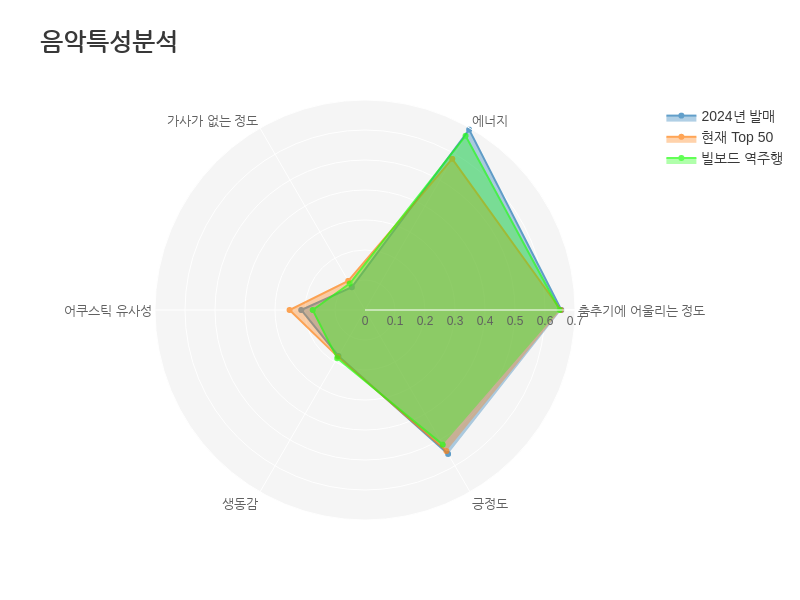

In [9]:
import plotly.graph_objects as go

# Plotly를 사용한 레이더 차트 생성
fig = go.Figure(
    data=[
        go.Scatterpolar(
            r=mean_vals.iloc[0],  # 2024년 노래 데이터
            theta=feat_cols,
            fill='toself',
            name='2024년 발매',
            line_color='rgb(31, 119, 180)',  # 파란색 라인
            opacity=0.7
        ),
        go.Scatterpolar(
            r=mean_vals.iloc[1],  # Top 50 데이터
            theta=feat_cols,
            fill='toself',
            name='현재 Top 50',
            line_color='rgb(255, 127, 14)',  # 주황색 라인
            opacity=0.7
        ),
        go.Scatterpolar(
            r=mean_vals.iloc[2],  # 빌보드 역주행 데이터
            theta=feat_cols,
            fill='toself',
            name='빌보드 역주행',
            line_color='rgb(31, 255, 14)',  # 초록색 라인
            opacity=0.7
        )
    ],
    layout=go.Layout(
        title=go.layout.Title(
            text='음악특성분석',
            font=dict(size=24, color='rgb(56, 56, 56)', family="Arial", weight="bold")
        ),
        polar=dict(
            radialaxis=dict(
                visible=True,
                range=[0, 0.7],  # 특성 값의 범위
                tickfont=dict(size=12, color='rgb(96, 96, 96)')
            ),
            angularaxis=dict(
                tickfont=dict(size=13, color='rgb(96, 96, 96)')
            ),
            bgcolor='rgb(245, 245, 245)'  # 배경 색상
        ),
        showlegend=True,
        legend=dict(
            font=dict(size=14, color='rgb(56, 56, 56)')
        )
    )
)

# 차트 크기 설정
fig.update_layout(
    width=800,  # 너비
    height=600  # 높이
)

# 차트 표시
fig.show(renderer="png")


### **energy** 특성은 **Top 50** 곡들이 **2024 Songs**와 **Billboard** 역주행 곡들에 비해 상대적으로 낮은 값을 보였습니다.  
### 반면, **acousticness** 특성은 **Top 50** 곡들이 가장 높은 값을 기록했고, 그 뒤를 이어 **2024 Songs**, **Billboard** 역주행 곡 순으로 높은 값을 나타냈습니다.